# Real-Estate-Analysis

Analysis of Real Estate Trend in USA in last 10 years from Zillow.com.  Among the factors investigated were the percentage median sale price increases and pattern in the seasonality of number of houses sold during the year.

[Plot1 : Median Sale Price growth over years in U.S](#median)<br/>
[Plot2 : Top 10 states by percentage increase in Median Sale Price from Sept 2011](#plot2)<br/>
[Plot3 : Top 10 metros by size](#plot3)<br/>
[Plot4 : Median Sale Price increase for Cities in Bay area ](#plot4)<br/>
[Plot5 : Home Sale Counts by state - US Map](#plot5)<br/>
[Plot6 : Days On Market  - Seasonality Trend over the years](#plot6)<br/>
[Plot7 :Days On Market trend - Heat Map](#plot7)


In [2]:
!pip install chart-studio==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [74]:
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import init_notebook_mode,iplot, plot
import plotly
import chart_studio as py

In [75]:
#Format function to show numbers morethan 1000 in the ticks in K
def fmt_x(x,y):
    if x >= 1000000:        
        val = int(x) / 1000000
        return '{:.1f}M'.format(val)
    elif x >= 1000:        
        val = int(x) / 1000
        return '{val:d}K'.format(val=int(val))
    else:
        return int(x)

In [76]:
sns.set_context("poster")

In [77]:
df_SalePrice = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Median Price/Sale_Prices_msa.CSV")
df_SalePrice.head(3)

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,102001,United States,0,188300.0,184800.0,181000.0,177700.0,175800.0,174700.0,173700.0,...,221000.0,224700.0,226600.0,230600.0,233800.0,236400.0,234900.0,230800.0,227700.0,NaN
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,373800.0,380000.0,384100.0,385900.0,387100.0,389400.0,396500.0,399100.0,NaN,NaN
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,472800.0,461900.0,445100.0,435000.0,421000.0,408500.0,392400.0,...,602300.0,612300.0,614300.0,618400.0,623700.0,627400.0,626700.0,621900.0,623500.0,626800.0


## Median Sale Price growth over years in U.S <a class="anchor" id="median"></a>

In [78]:
#Select USA
df_US = df_SalePrice.iloc[0:2:2,1::1]
df_US

,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,0,188300.0,184800.0,181000.0,177700.0,175800.0,174700.0,173700.0,172700.0,...,221000.0,224700.0,226600.0,230600.0,233800.0,236400.0,234900.0,230800.0,227700.0,NaN


In [79]:
df_US.drop(['SizeRank','RegionName'], axis=1, inplace = True)

#transposing into columns
df_US = df_US.transpose()

#Reset index
df_US.reset_index(level=0,inplace=True)

##Name columns
df_US.columns = ['YearMonth','Median_Sales_Price']

##Make a new column Year from YearMonth
df_US['Year']= (df_US['YearMonth'].str.split('-').str[0])
df_US.head()

df_US.head(3)

,YearMonth,Median_Sales_Price,Year
0,2008-03,188300.0,2008
1,2008-04,184800.0,2008
2,2008-05,181000.0,2008


In [80]:
##Make a new dataframe groupby year
df_US = df_US.groupby('Year', as_index=False).mean()
df_US.head(5)

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/1029629879.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Year,Median_Sales_Price
0,2008,176660.000000
1,2009,157666.666667
2,2010,160258.333333
3,2011,152166.666667
4,2012,157133.333333


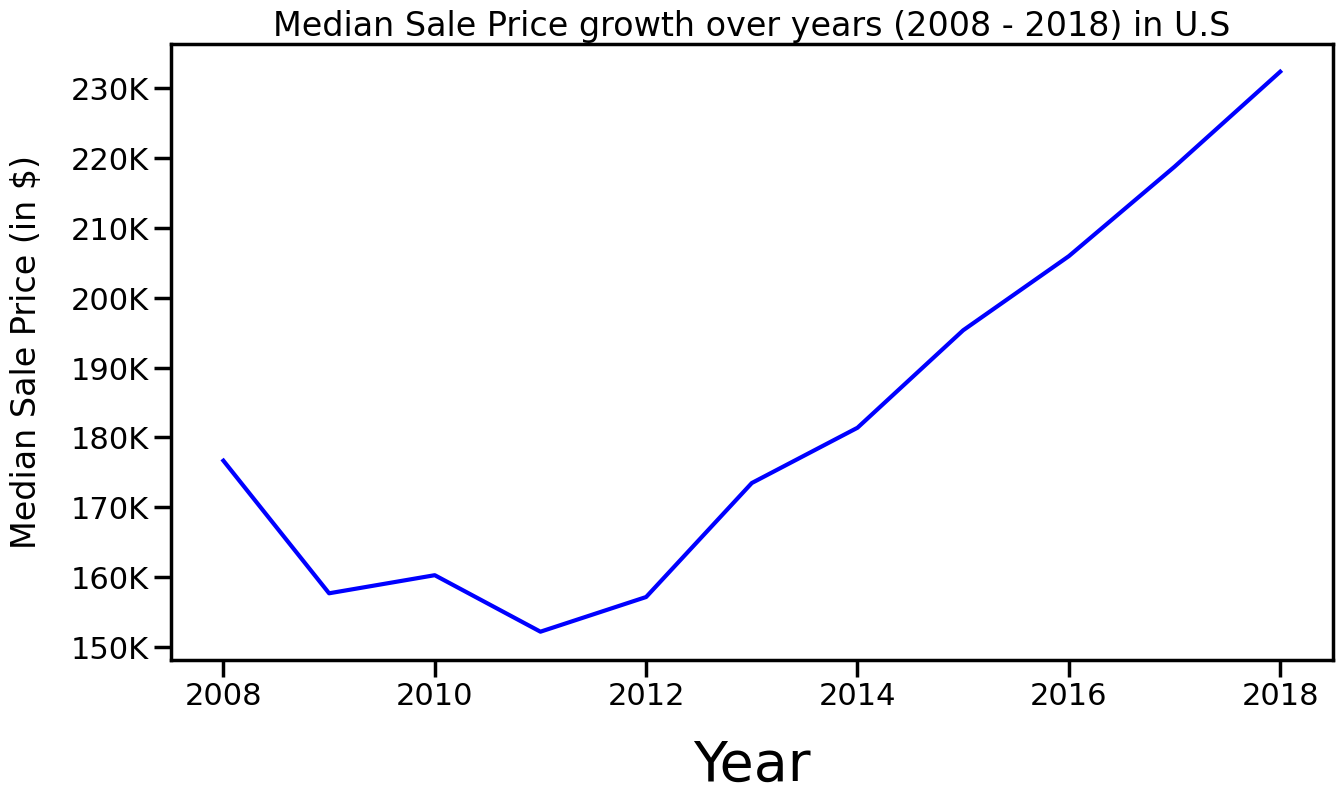

In [81]:
ax=df_US.plot(kind='line', x="Year", figsize=(15,8), color='blue')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Year", labelpad=20, fontsize = 40)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Sale Price growth over years (2008 - 2018) in U.S")
ax.legend_.remove()
plt.show()

Insights : Median Sale price of houses in U.S increased by 55% from its rock bottom in 2011. The decrease from 2008 to 2011 can be explained by the depression in the ecomony and hence the housing market. 

But the prices seen on the y-axis, 140k - 230k, is a scale for prices unheard of in California. we see this discrepancy, due the inclusion of all states (with Housing prices high and low ranges). It could also be due the types of houses (condos, townhomes, single-family homes) and in all zipcodes.

Hence we like to investigate further to see how the various states fared in terms of the median house price increase.

##  Median Sale Price Increase By State <a class="anchor" id="plot2"></a>

In [82]:
df_SalePrice_State = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Median Price/Sale_Prices_State.CSV")
df_SalePrice_State.head(3)

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,9,California,1,387800.0,370900.0,348000.0,332700.0,317800.0,305500.0,291500.0,...,466200.0,471600.0,472600.0,475000.0,479100.0,483100.0,487800.0,487100.0,487200.0,485800.0
1,54,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213000.0,212400.0,211600.0,211300.0,213400.0,215200.0,216300.0,216900.0,218100.0,NaN
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286700.0,295300.0,303000.0,308000.0,305100.0,298600.0,295600.0,288100.0,NaN,NaN


In [83]:
df_state = df_SalePrice_State.iloc[0:,1::6]

df_state.set_index('RegionName').head()

,2008-07,2009-01,2009-07,2010-01,2010-07,2011-01,2011-07,2012-01,2012-07,2013-01,...,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
California,317800.0,243000.0,230600.0,263000.0,266800.0,255400.0,243900.0,246600.0,271600.0,309600.0,...,369200.0,379700.0,387000.0,401900.0,418900.0,422600.0,439100.0,459700.0,475000.0,485800.0
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,173700.0,179800.0,186000.0,187200.0,194200.0,200400.0,204600.0,211300.0,NaN
New York,NaN,NaN,NaN,NaN,NaN,246800.0,258000.0,226000.0,247600.0,252300.0,...,263800.0,261500.0,260100.0,262700.0,267900.0,280400.0,279300.0,291600.0,308000.0,NaN
Florida,184300.0,150900.0,126100.0,130300.0,120600.0,115100.0,116000.0,120400.0,125700.0,135900.0,...,151600.0,154100.0,161800.0,171700.0,180200.0,187000.0,195600.0,203000.0,220500.0,NaN
Illinois,181100.0,174200.0,152100.0,171500.0,158800.0,156200.0,141000.0,138700.0,140100.0,143800.0,...,169600.0,168500.0,176000.0,181800.0,178500.0,185400.0,190500.0,192400.0,194600.0,NaN


In [84]:
##Calculate Min and Max of the series
df_state['Min'] = df_state.min(axis=1)
df_state['Max'] = df_state.max(axis=1)

##Calculate Diff of Min and Max
df_state['Diff'] = df_state['Max'] - df_state['Min']

##Calculate Percentage increase from the rock bottom in 2011
df_state['PctChange'] = (df_state['Diff']/df_state['Min'])*100

## Sort Values by percentage increase
df_state.sort_values(by='PctChange').head()

df_top10 = df_state.sort_values(by='PctChange').tail(10)
df_top10 = df_top10.loc[:, ['RegionName','PctChange']]

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/1928706784.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/1928706784.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [85]:
df_top10.set_index('RegionName')

,PctChange
RegionName,
Tennessee,63.805970
West Virginia,66.920566
Oregon,75.013492
Georgia,87.837838
Florida,91.572546
Colorado,91.716621
California,110.667823
Arizona,110.880829
Nevada,128.381963


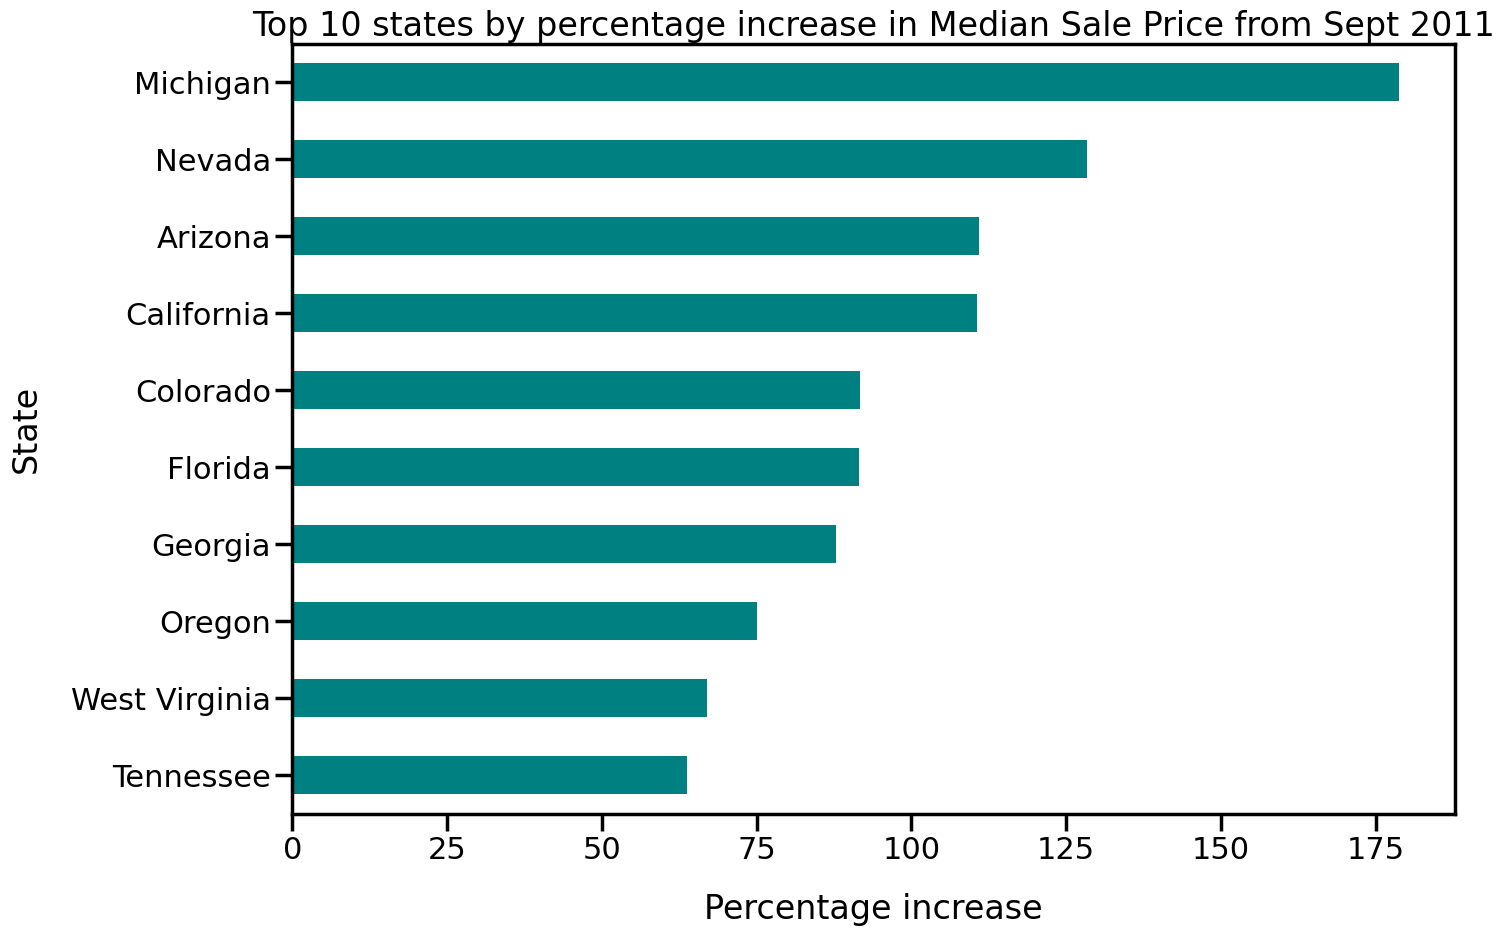

In [86]:
sns.set_context("poster")
ax = df_top10.plot(kind='barh',x='RegionName', figsize=(15, 10), rot=0, color='Teal')
ax.xaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Percentage increase", labelpad=20)
plt.ylabel("State", labelpad=20)
plt.title("Top 10 states by percentage increase in Median Sale Price from Sept 2011")
ax.legend_.remove()
plt.show()

### Analysis2:  Michigan and Nevada had about 175% to 150% increase in Median Sale price in the last few years from Sept 2011. California came in 4th with 115% increase in meadian Sale price.

I tried to delve in further more to see which metros have the high increase in median sale price, in the top 5 metros by size.

## Top 5 metros by size <a class="anchor" id="plot3"></a>

In [87]:
df_SalePrice_City = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Median Price/Sale_Prices_City.CSV")
df_SalePrice_City.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,6181.0,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,546500.0,546000.0,552100.0,565700.0,572600.0,574800.0,569500.0,567100.0,556200.0,552900.0
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
3,13271.0,Philadelphia,Pennsylvania,4,113100.0,113200.0,113500.0,110300.0,108600.0,112100.0,...,143700.0,146500.0,149800.0,156700.0,154700.0,154900.0,152400.0,154600.0,153000.0,NaN
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0


In [88]:
df_SalePrice_Cities = df_SalePrice_City.sort_values(by="SizeRank").head(5)
df_SalePrice_City.dropna(axis=0, inplace=True)
df_SalePrice_City.head(5)

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0
7,54296.0,San Diego,California,8,419800.0,408200.0,398800.0,380600.0,371300.0,356600.0,...,553600.0,566300.0,574300.0,577800.0,572000.0,573200.0,577600.0,583200.0,584200.0,585000.0
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0


In [89]:
#Select subset of columns
df_Cities_6mon = df_SalePrice_Cities.iloc[0:,1::6]
df_Cities_6mon.head()

,RegionName,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
0,New York,NaN,NaN,NaN,NaN,NaN,449900.0,463500.0,438900.0,470600.0,...,482800.0,491600.0,490700.0,524600.0,540400.0,540900.0,543900.0,544000.0,552100.0,556200.0
1,Los Angeles,449200.0,374700.0,323100.0,354400.0,347000.0,364500.0,343600.0,333200.0,341700.0,...,484400.0,504400.0,510900.0,532300.0,563200.0,578400.0,605600.0,629700.0,672200.0,688000.0
2,Chicago,282100.0,264000.0,231200.0,242200.0,231200.0,215200.0,194000.0,194600.0,196000.0,...,251500.0,259300.0,268300.0,272200.0,257800.0,269800.0,281500.0,276400.0,275000.0,277800.0
3,Philadelphia,110300.0,110300.0,113600.0,126400.0,120000.0,105600.0,111300.0,103800.0,108200.0,...,117500.0,119200.0,119600.0,123400.0,124600.0,127900.0,131500.0,145900.0,149800.0,153000.0
4,Phoenix,198300.0,122600.0,82300.0,105000.0,105500.0,84600.0,82300.0,98800.0,122000.0,...,164400.0,162500.0,175100.0,190000.0,198300.0,205100.0,212400.0,214700.0,230100.0,237000.0


In [90]:
df_Cities_6mon.set_index('RegionName')

,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,2012-12,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
RegionName,,,,,,,,,,,,,,,,,,,,,
New York,NaN,NaN,NaN,NaN,NaN,449900.0,463500.0,438900.0,470600.0,492300.0,...,482800.0,491600.0,490700.0,524600.0,540400.0,540900.0,543900.0,544000.0,552100.0,556200.0
Los Angeles,449200.0,374700.0,323100.0,354400.0,347000.0,364500.0,343600.0,333200.0,341700.0,400400.0,...,484400.0,504400.0,510900.0,532300.0,563200.0,578400.0,605600.0,629700.0,672200.0,688000.0
Chicago,282100.0,264000.0,231200.0,242200.0,231200.0,215200.0,194000.0,194600.0,196000.0,203800.0,...,251500.0,259300.0,268300.0,272200.0,257800.0,269800.0,281500.0,276400.0,275000.0,277800.0
Philadelphia,110300.0,110300.0,113600.0,126400.0,120000.0,105600.0,111300.0,103800.0,108200.0,111500.0,...,117500.0,119200.0,119600.0,123400.0,124600.0,127900.0,131500.0,145900.0,149800.0,153000.0
Phoenix,198300.0,122600.0,82300.0,105000.0,105500.0,84600.0,82300.0,98800.0,122000.0,142800.0,...,164400.0,162500.0,175100.0,190000.0,198300.0,205100.0,212400.0,214700.0,230100.0,237000.0


In [91]:
## Transpose
df_cities_T = df_Cities_6mon.set_index('RegionName').T
df_cities_T.head()

RegionName,New York,Los Angeles,Chicago,Philadelphia,Phoenix
2008-06,NaN,449200.0,282100.0,110300.0,198300.0
2008-12,NaN,374700.0,264000.0,110300.0,122600.0
2009-06,NaN,323100.0,231200.0,113600.0,82300.0
2009-12,NaN,354400.0,242200.0,126400.0,105000.0
2010-06,NaN,347000.0,231200.0,120000.0,105500.0


In [92]:
df_cities_T = df_cities_T.dropna()
df_cities_T.head()

RegionName,New York,Los Angeles,Chicago,Philadelphia,Phoenix
2010-12,449900.0,364500.0,215200.0,105600.0,84600.0
2011-06,463500.0,343600.0,194000.0,111300.0,82300.0
2011-12,438900.0,333200.0,194600.0,103800.0,98800.0
2012-06,470600.0,341700.0,196000.0,108200.0,122000.0
2012-12,492300.0,400400.0,203800.0,111500.0,142800.0


In [93]:
##Reset index
df_cities_T.reset_index(level=0,inplace=True)

##Name columns
df_cities_T.columns = ['YearMonth', 'New York','Los Angeles', 'Chicago', 'Philadelphia', 'Phoenix',]

#Extract Month and Year into separate columns
df_cities_T['Year']= (df_cities_T['YearMonth'].str.split('-').str[0])
df_cities_T['Month']= (df_cities_T['YearMonth'].str.split('-').str[1])

df_cities_T['MonthName']=df_cities_T['Month'].apply(lambda x: 'Jun' if x == '06' else 'Dec')
df_cities_T['Yr']=df_cities_T['Year'].apply(lambda x: '\''+x[-2:])
df_cities_T['MonthYr']=df_cities_T['MonthName'] +' '+ df_cities_T['Yr']

In [94]:
df_cities_T.head()

,YearMonth,New York,Los Angeles,Chicago,Philadelphia,Phoenix,Year,Month,MonthName,Yr,MonthYr
0,2010-12,449900.0,364500.0,215200.0,105600.0,84600.0,2010,12,Dec,'10,Dec '10
1,2011-06,463500.0,343600.0,194000.0,111300.0,82300.0,2011,06,Jun,'11,Jun '11
2,2011-12,438900.0,333200.0,194600.0,103800.0,98800.0,2011,12,Dec,'11,Dec '11
3,2012-06,470600.0,341700.0,196000.0,108200.0,122000.0,2012,06,Jun,'12,Jun '12
4,2012-12,492300.0,400400.0,203800.0,111500.0,142800.0,2012,12,Dec,'12,Dec '12


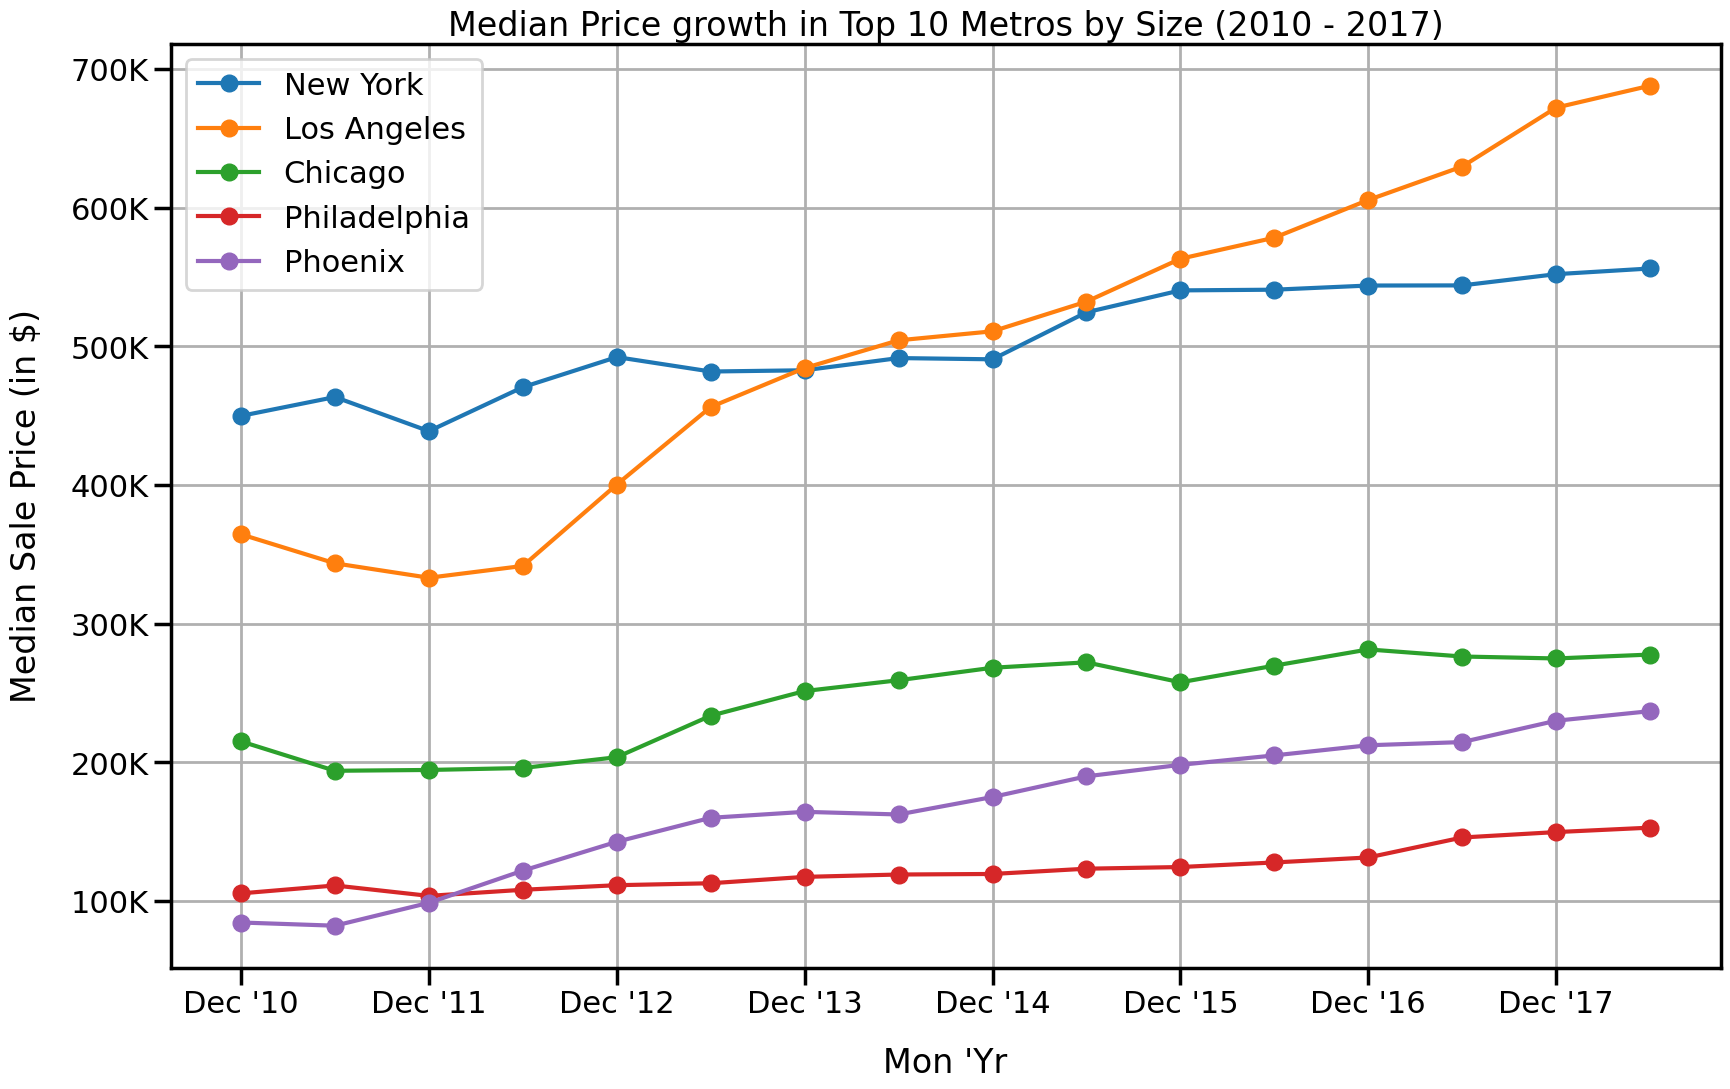

In [95]:
ax=df_cities_T.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Mon 'Yr", labelpad=20)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Price growth in Top 10 Metros by Size (2010 - 2017)")
plt.show()

##Analysis 3 : Among the Top 5 metros by size, Los Angeles saw the highest percentage increase in median sale price(150%)

## Median Sale Price increase for Cities in Bay area (San Jose, San Francisco & Santa Clara)<a class="anchor" id="plot4"></a>

In [96]:
df_SalePrice_City.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0
7,54296.0,San Diego,California,8,419800.0,408200.0,398800.0,380600.0,371300.0,356600.0,...,553600.0,566300.0,574300.0,577800.0,572000.0,573200.0,577600.0,583200.0,584200.0,585000.0
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0


In [97]:
df_SalePrice_City1 = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Median Price/Sale_Prices_City.CSV")

In [98]:
df_BayArea = df_SalePrice_City1[(df_SalePrice_City['RegionName']=='Santa Clara') | (df_SalePrice_City1['RegionName']=='San Jose') | (df_SalePrice_City1['RegionName']=='San Francisco')]
df_BayArea

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0
11,20330.0,San Francisco,California,12,792500.0,784400.0,782400.0,779000.0,787300.0,793600.0,...,1282800.0,1290600.0,1287900.0,1291100.0,1288100.0,1307000.0,1318200.0,1327100.0,1316400.0,NaN
170,13713.0,Santa Clara,California,171,586300.0,581300.0,575200.0,600700.0,611200.0,620700.0,...,1166700.0,1211000.0,1255200.0,1300200.0,1352900.0,1355300.0,1382300.0,1324100.0,1304400.0,1307000.0


In [99]:
##Subset columns
df_BayArea = df_BayArea.iloc[0:,1::6]
df_BayArea

,RegionName,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
9,San Jose,543300.0,428300.0,366700.0,448600.0,446400.0,448600.0,422500.0,422600.0,450200.0,...,616700.0,640200.0,669100.0,705300.0,738400.0,760300.0,785600.0,817400.0,970900.0,1054600.0
11,San Francisco,779000.0,704300.0,666400.0,713700.0,670000.0,686300.0,660700.0,654700.0,695700.0,...,869400.0,929000.0,1026100.0,1135600.0,1150800.0,1157100.0,1206500.0,1203100.0,1287900.0,1316400.0
170,Santa Clara,600700.0,539800.0,495800.0,579900.0,519200.0,549700.0,508300.0,536100.0,564600.0,...,700500.0,696900.0,753500.0,845700.0,904800.0,926500.0,968800.0,1042900.0,1255200.0,1304400.0


In [100]:
df_BayArea_T = df_BayArea.set_index('RegionName').T
df_BayArea_T.head()

RegionName,San Jose,San Francisco,Santa Clara
2008-06,543300.0,779000.0,600700.0
2008-12,428300.0,704300.0,539800.0
2009-06,366700.0,666400.0,495800.0
2009-12,448600.0,713700.0,579900.0
2010-06,446400.0,670000.0,519200.0


In [101]:
##Reset index
df_BayArea_T.reset_index(level=0,inplace=True)

In [102]:
##Name columns
df_BayArea_T.columns = ['YearMonth','San Jose', 'San Francisco', 'Santa Clara']

In [103]:
df_BayArea_T['Year']= (df_BayArea_T['YearMonth'].str.split('-').str[0])
df_BayArea_T['Month']= (df_BayArea_T['YearMonth'].str.split('-').str[1])

df_BayArea_T['MonthName']=df_BayArea_T['Month'].apply(lambda x: 'Jun' if x == '06' else 'Dec')
df_BayArea_T['Yr']=df_BayArea_T['Year'].apply(lambda x: '\''+x[-2:])
df_BayArea_T['MonthYr']=df_BayArea_T['MonthName'] +' '+ df_BayArea_T['Yr']

In [104]:
df_BayArea_T.head()

,YearMonth,San Jose,San Francisco,Santa Clara,Year,Month,MonthName,Yr,MonthYr
0,2008-06,543300.0,779000.0,600700.0,2008,06,Jun,'08,Jun '08
1,2008-12,428300.0,704300.0,539800.0,2008,12,Dec,'08,Dec '08
2,2009-06,366700.0,666400.0,495800.0,2009,06,Jun,'09,Jun '09
3,2009-12,448600.0,713700.0,579900.0,2009,12,Dec,'09,Dec '09
4,2010-06,446400.0,670000.0,519200.0,2010,06,Jun,'10,Jun '10


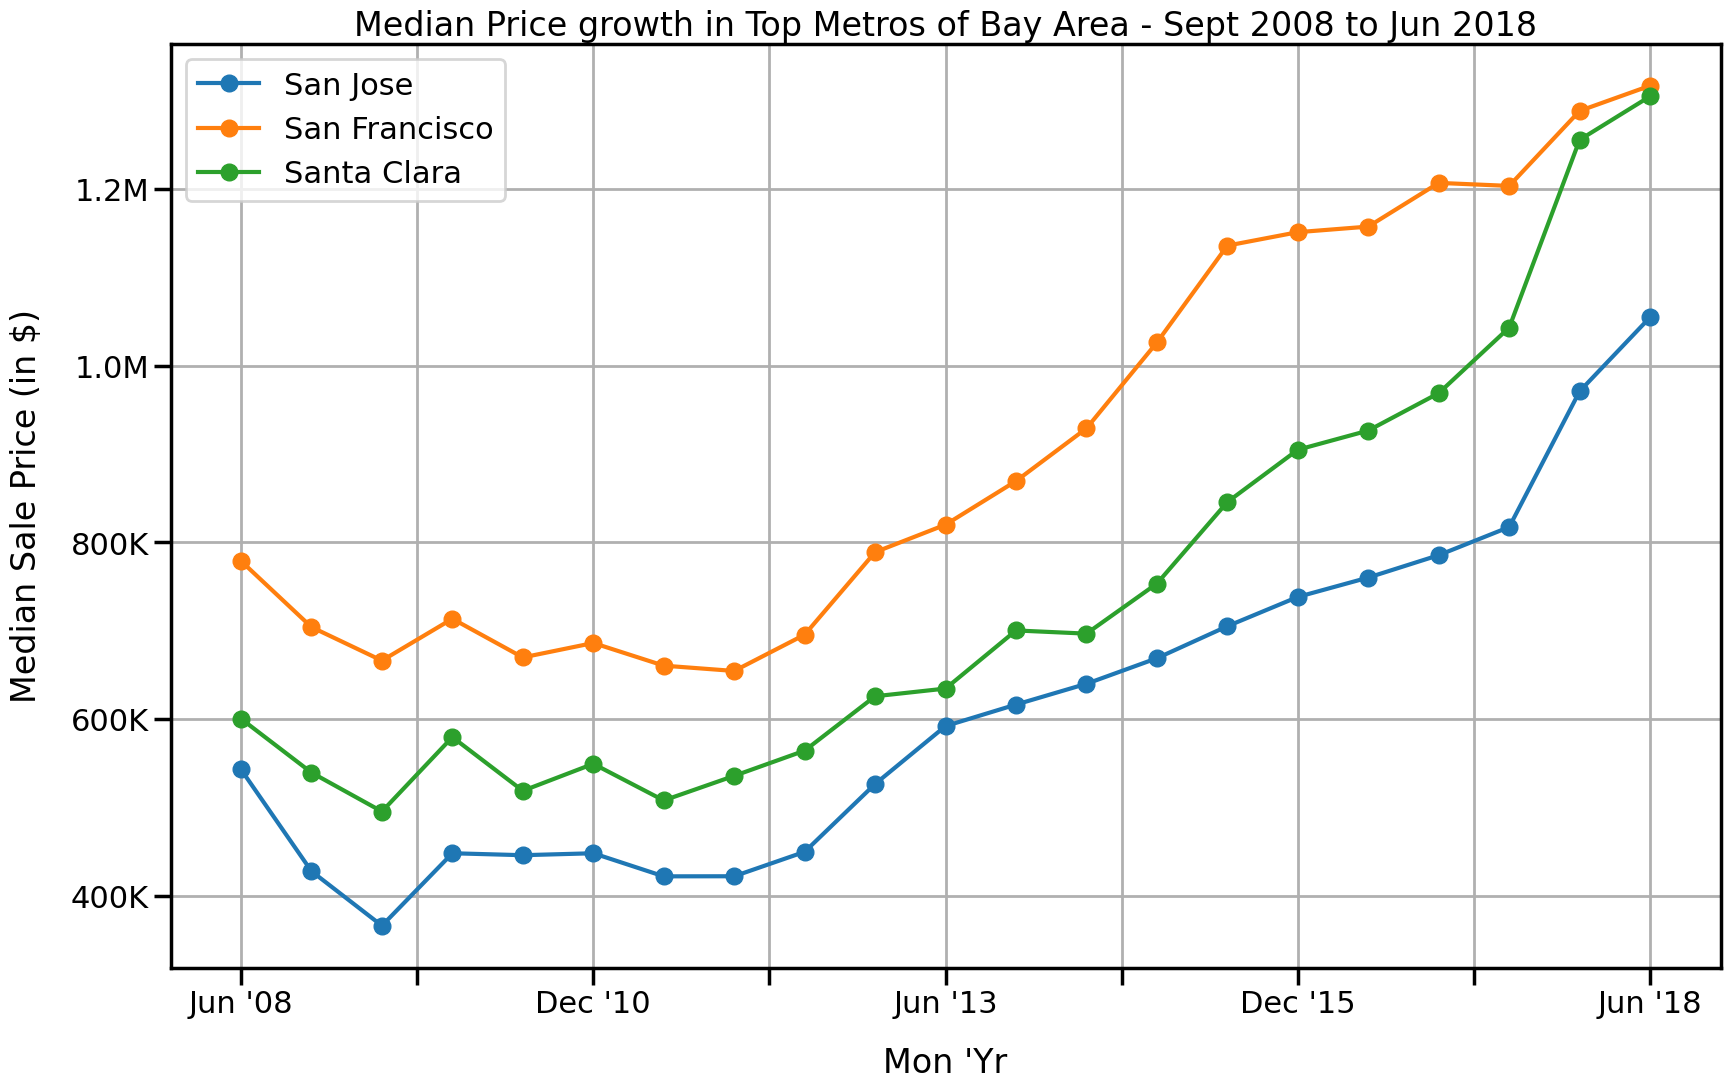

In [105]:
sns.set_context("poster")
ax=df_BayArea_T.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Mon 'Yr", labelpad=20)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Price growth in Top Metros of Bay Area - Sept 2008 to Jun 2018")    
plt.show()    

Analysis : Bay area cities a much higher percentage increase in their Median Sale price as compared to Nation increase 
           San Jose - 150%
           Santa Clara - 156%
           San Francisco - 101%

## Home Sale Counts by state - US Map <a class="anchor" id="plot5"></a>

In [106]:
df_Counts_State = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Home Sale Counts/Sale_Counts_State.CSV")
df_Counts_State.head()

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,9,California,1,23518.0,28536.0,31373.0,33071.0,36669.0,35316.0,36477.0,...,41189,37759,36593,29333,29312,39767,40783,44718,44630.0,43208.0
1,54,Texas,2,23774.0,25876.0,26542.0,27791.0,28239.0,25213.0,21392.0,...,32804,28839,29941,24783,25329,31152,32593,38935,39184.0,NaN
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19289,17409,17860,16239,13335,14014,14461,17680,NaN,NaN
3,14,Florida,4,17429.0,19501.0,19766.0,20462.0,20923.0,17640.0,17759.0,...,38908,36071,40928,36048,34492,45172,46433,49560,48507.0,NaN
4,21,Illinois,5,11823.0,13158.0,13967.0,15312.0,16499.0,15070.0,14189.0,...,19981,18048,17525,14702,12155,17074,19639,23725,27333.0,NaN


In [107]:
df_Counts_State = df_Counts_State.drop(['RegionID','SizeRank'], axis=1)
df_Counts_State['Avg'] = df_Counts_State.mean(axis=1)
df_Counts_State.head()
df_state_MeanCount = df_Counts_State.loc[:, ['RegionName','Avg']]

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/3910640537.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [108]:
df_state_MeanCount.head()

,RegionName,Avg
0,California,36122.296000
1,Texas,25739.443548
2,New York,13604.477778
3,Florida,31568.653226
4,Illinois,15204.161290


In [109]:
import chart_studio.plotly as py
import plotly as ply
import pandas as pd

#for col in df_persqft_state.columns:
 #   df_persqft_state['Increase'] = df_persqft_state['Diff'].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


df_state_MeanCount['text'] = df_state_MeanCount['RegionName'] + '<br>' +\
    'Avg Count: '+df_state_MeanCount['Avg'].astype(str)
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_state_MeanCount['RegionName'],
        z = df_state_MeanCount['Avg'].astype(float),
        locationmode = 'USA-states',
        text = df_state_MeanCount['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avg Count")
        ) ]


layout = dict(
        title = 'Avg Count of Houses Sold Monthly (2010 - 2018)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

<div>
    <a href="https://plot.ly/~singuava/8/?share_key=t42budrsWYDdGzeUXaF7fS" target="_blank" title="Avg HousesSold - 2" style="display: block; text-align: center;"><img src="https://plot.ly/~singuava/8.png?share_key=t42budrsWYDdGzeUXaF7fS" alt="Avg HousesSold - 2" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="singuava:8" sharekey-plotly="t42budrsWYDdGzeUXaF7fS" src="https://plot.ly/embed.js" async></script>
</div>

Analysis  : California, Texas, Florida are 3 popular states in terms of Avg. houses sold per month. They all range from 25000 to 36000 avg. number of houses sold per month.

## Days On Market  - Seasonality Trend over the years  <a class="anchor" id="plot6"></a>

In [54]:
df_age = pd.read_csv("/Users/ashleshkhajbage/Documents/GitHub/Real-Estate-Analysis/data/Inventory/AgeOfInventory_Metro_Public.CSV")
df_age.head(3)

,RegionName,RegionType,StateFullName,DataTypeDescription,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,Country,NaN,All Homes,119,114,102,84,78,80,...,81,85,92,98,91,67,60,57,58,62
1,"New York, NY",Msa,New York,All Homes,136,126,112,86,81,86,...,82,84,92,99,78,51,55,53,58,66
2,"Chicago, IL",Msa,Illinois,All Homes,140,135,122,98,88,88,...,78,86,98,105,88,50,46,50,54,60


In [55]:
df_age = df_age[(df_age['RegionName']=='San Francisco, CA')  | (df_age['RegionName']=='United States')]

In [56]:
df_age

,RegionName,RegionType,StateFullName,DataTypeDescription,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,Country,NaN,All Homes,119,114,102,84,78,80,...,81,85,92,98,91,67,60,57,58,62
10,"San Francisco, CA",Msa,California,All Homes,82,60,42,39,35,40,...,25,34,46,26,15,14,14,15,20,24


In [57]:
df_age = df_age.drop(['RegionType','StateFullName','DataTypeDescription'], axis=1)
df_age.head()

,RegionName,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,119,114,102,84,78,80,86,91,94,...,81,85,92,98,91,67,60,57,58,62
10,"San Francisco, CA",82,60,42,39,35,40,38,40,36,...,25,34,46,26,15,14,14,15,20,24


In [58]:
df_age_T = df_age.set_index('RegionName').T
df_age_T.reset_index(level=0,inplace=True)
df_age_T.head()

RegionName,index,United States,"San Francisco, CA"
0,2012-01,119,82
1,2012-02,114,60
2,2012-03,102,42
3,2012-04,84,39
4,2012-05,78,35


In [59]:
##Name columns
df_age_T.columns = ['YearMonth','United States', 'San Francisco, CA']

In [60]:
##Make a new column Year from YearMonth
df_age_T['Year']= (df_age_T['YearMonth'].str.split('-').str[0])
df_age_T['Month']= (df_age_T['YearMonth'].str.split('-').str[1])
df_age_T.head()

,YearMonth,United States,"San Francisco, CA",Year,Month
0,2012-01,119,82,2012,01
1,2012-02,114,60,2012,02
2,2012-03,102,42,2012,03
3,2012-04,84,39,2012,04
4,2012-05,78,35,2012,05


In [61]:
df_age_T_2017 = df_age_T[(df_age_T['Year'].astype(int) < 2018)]
df_age_T_2017.head()

,YearMonth,United States,"San Francisco, CA",Year,Month
0,2012-01,119,82,2012,01
1,2012-02,114,60,2012,02
2,2012-03,102,42,2012,03
3,2012-04,84,39,2012,04
4,2012-05,78,35,2012,05


In [62]:
Month_to_MonthName = { '01' : 'Jan', 
                  '02' : 'Feb', 
                  '03' : 'Mar', 
                  '04' : 'Apr', 
                  '05' : 'May',
                  '06' : 'Jun', 
                  '07' : 'Jul', 
                  '08' : 'Aug', 
                  '09' : 'Sep', 
                  '10' : 'Oct',
                  '11' : 'Nov', 
                  '12' : 'Dec'}
df_age_T_2017['MonthName'] = df_age_T_2017['Month'].map(Month_to_MonthName)
df_age_T_2017['Yr']=df_age_T_2017['Year'].apply(lambda x: '\''+x[-2:])
df_age_T_2017['MonthYr']=df_age_T_2017['MonthName'] +' '+ df_age_T_2017['Yr']

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/192814202.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/192814202.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/192814202.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [63]:
df_age_T_2017.head()

,YearMonth,United States,"San Francisco, CA",Year,Month,MonthName,Yr,MonthYr
0,2012-01,119,82,2012,01,Jan,'12,Jan '12
1,2012-02,114,60,2012,02,Feb,'12,Feb '12
2,2012-03,102,42,2012,03,Mar,'12,Mar '12
3,2012-04,84,39,2012,04,Apr,'12,Apr '12
4,2012-05,78,35,2012,05,May,'12,May '12


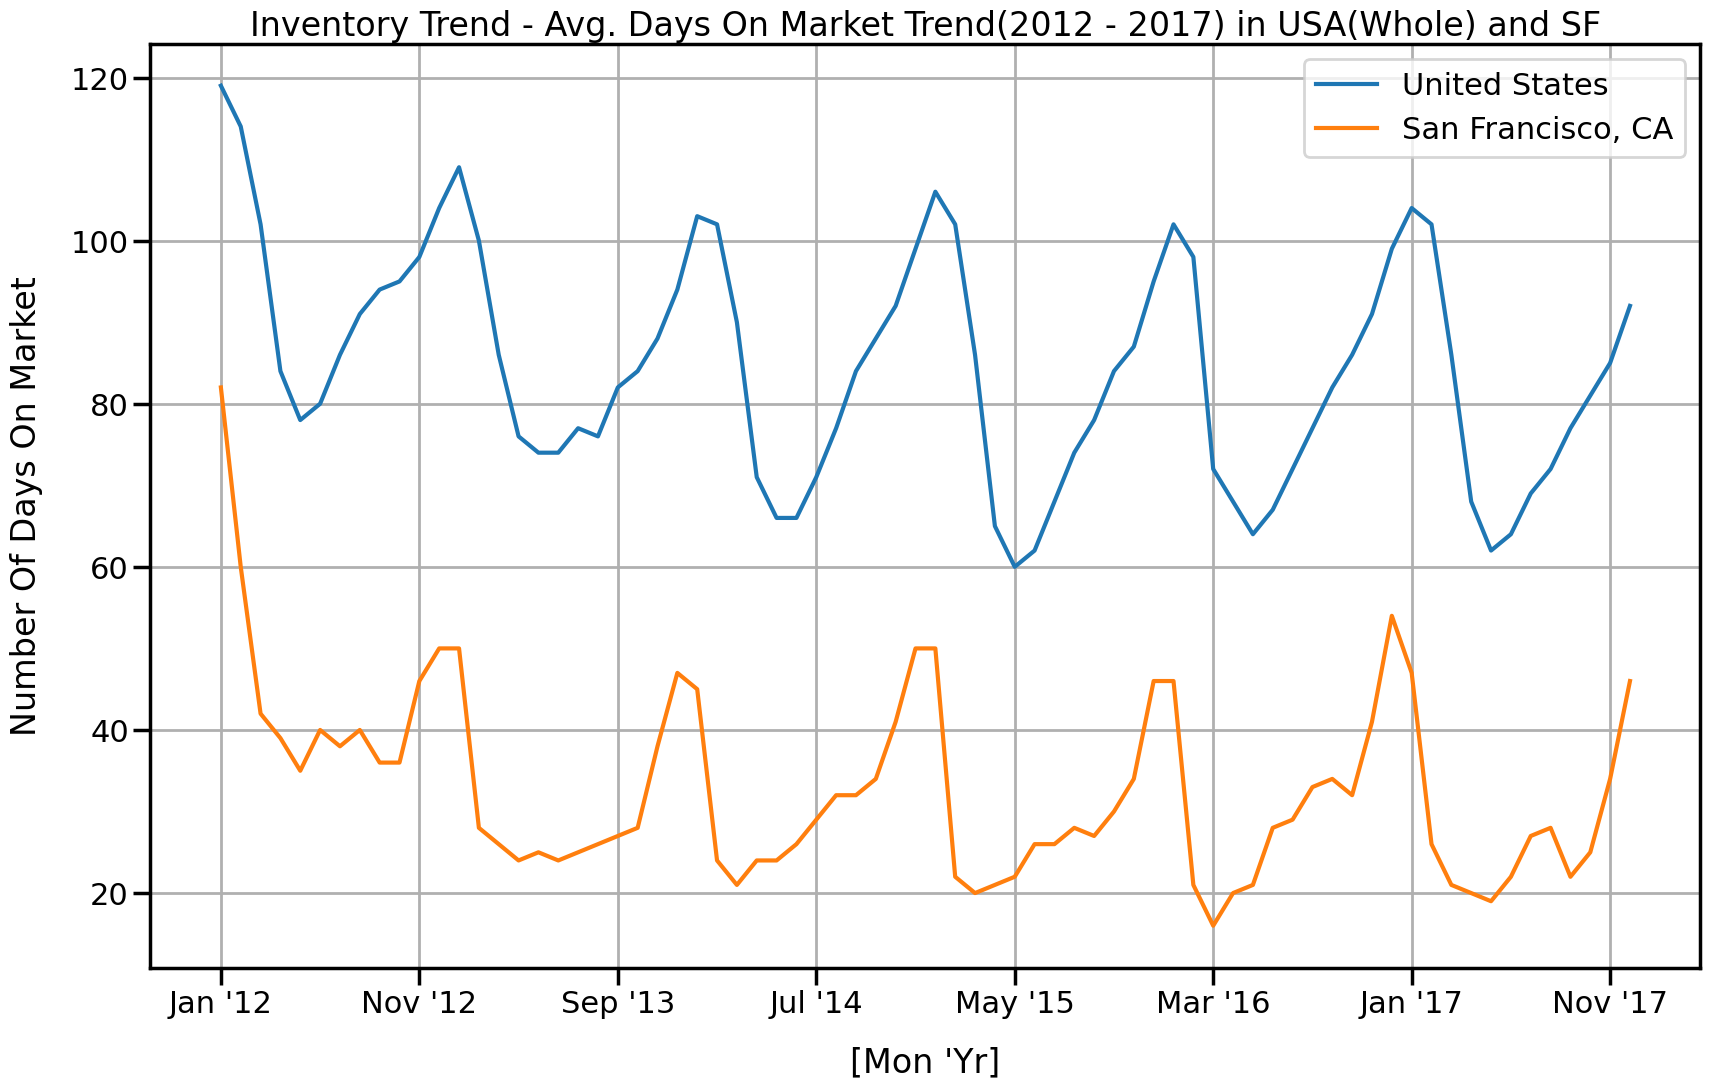

In [64]:
sns.set_context("poster")
ax=df_age_T_2017.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True)
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("[Mon 'Yr]", labelpad=20)
plt.ylabel("Number Of Days On Market", labelpad=20)
plt.title("Inventory Trend - Avg. Days On Market Trend(2012 - 2017) in USA(Whole) and SF")
plt.show()

Analysis : 1) A clear pattern seasonality pattern can be observed between SF and USA over the years. Winter months (Nov - Feb) are periods of low house buying and hence the 'Days On Market' a property has been 'Active' in market are in the peak. Where as in summer properties tend to get sold faster. Hence the avg. days on market in these months is low.
2) The number of Days properties are on market, has decreased over the years from 2012 - 2017

In [65]:
df_age_T_2yrs = df_age_T[(df_age_T['Year']=='2017')]
df_age_T_2yrs['MonthName'] =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_20097/273021963.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df_age_T_2yrs.head()

,YearMonth,United States,"San Francisco, CA",Year,Month,MonthName
60,2017-01,104,47,2017,01,Jan
61,2017-02,102,26,2017,02,Feb
62,2017-03,86,21,2017,03,Mar
63,2017-04,68,20,2017,04,Apr
64,2017-05,62,19,2017,05,May


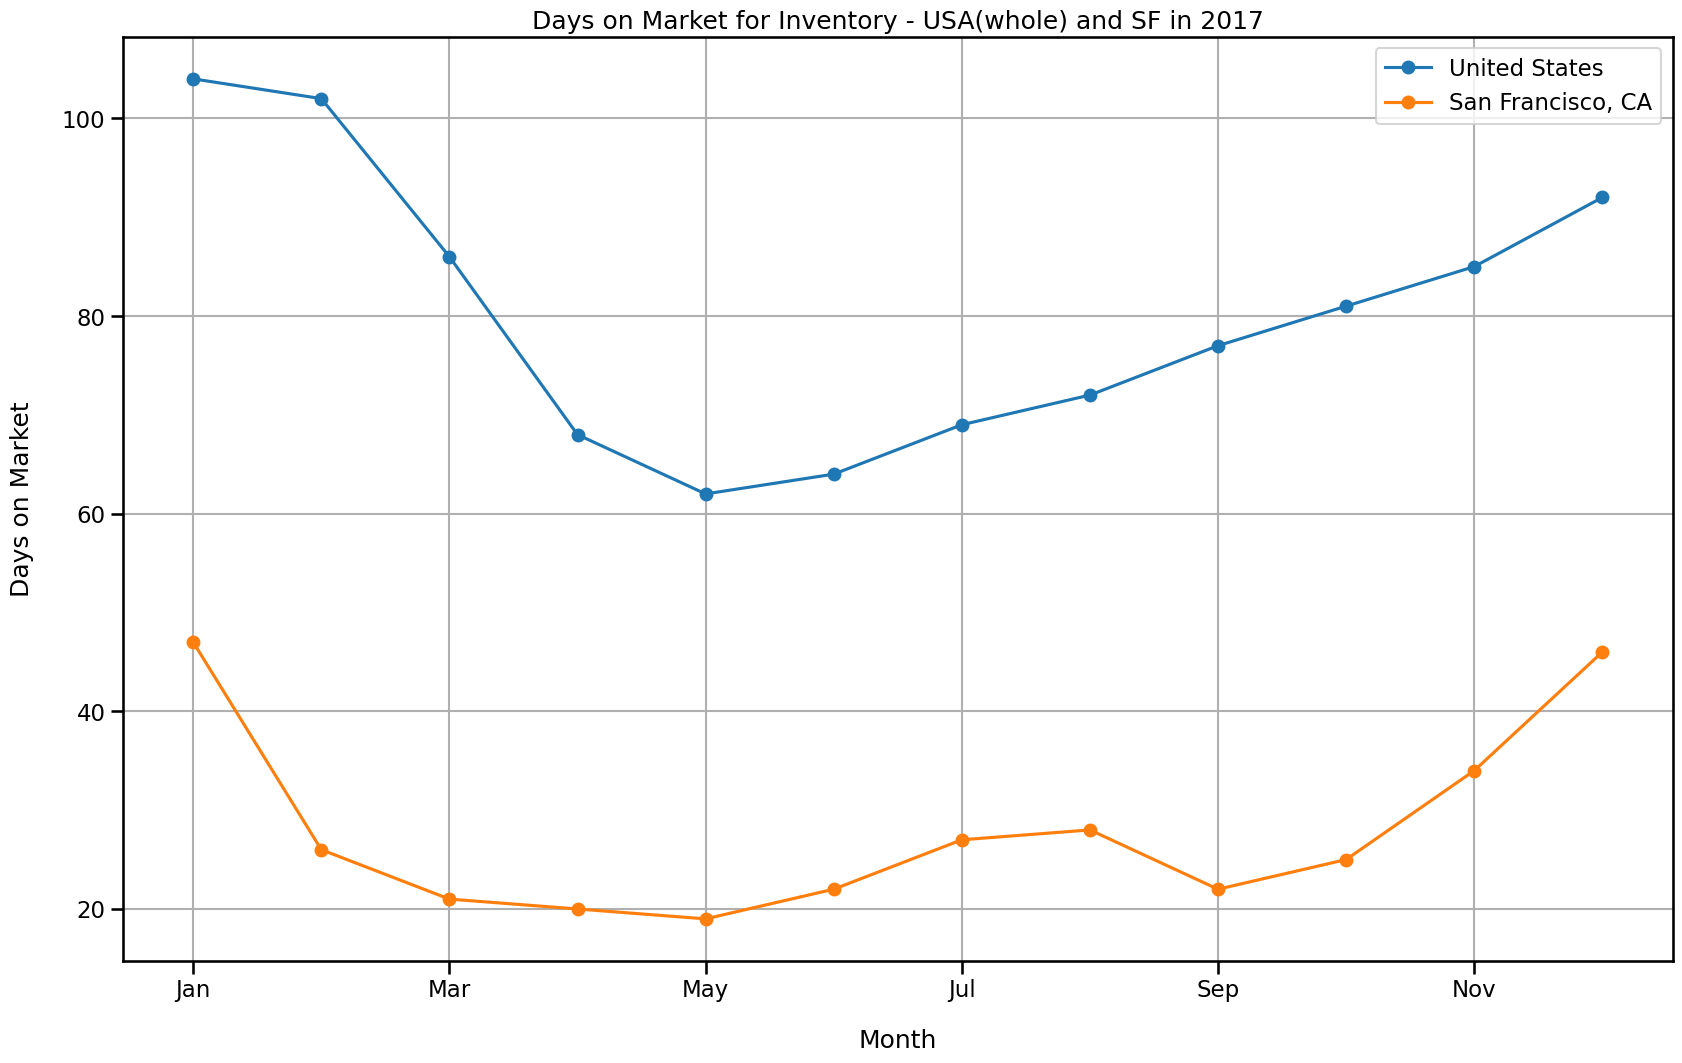

In [67]:
sns.set_context("talk")
ax=df_age_T_2yrs.plot(kind='line', figsize=(20,12),x='MonthName', grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Month", labelpad=20)
plt.ylabel("Days on Market", labelpad=20)
plt.title("Days on Market for Inventory - USA(whole) and SF in 2017")
plt.show()

Analysis : Observing the same seasonality trend seen before by zooming in into a single year(2017)

In [69]:
df_DOM_US = df_age_T.loc[:, ['Year', 'Month','United States']]
df_DOM_US.head()

,Year,Month,United States
0,2012,01,119
1,2012,02,114
2,2012,03,102
3,2012,04,84
4,2012,05,78


In [70]:
df_DOM_US_2017 = df_DOM_US[(df_DOM_US['Year'].astype(int) < 2018)]
df_DOM_US_idx = df_DOM_US_2017.set_index(['Year','Month'])
dfDOMbyYrMon = df_DOM_US_idx.unstack(level=0)
dfDOMbyYrMon.head()

United States                         
Year           2012 2013 2014 2015 2016 2017
Month                                       
01              119  109  103  106  102  104
02              114  100  102  102   98  102
03              102   86   90   86   72   86
04               84   76   71   65   68   68
05               78   74   66   60   64   62

In [71]:
month_short_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
year_short_names = ['2012', '2013', '2014', '2015', '2016', '2017']

## Days On Market trend - Heat Map <a class="anchor" id="plot7"></a>

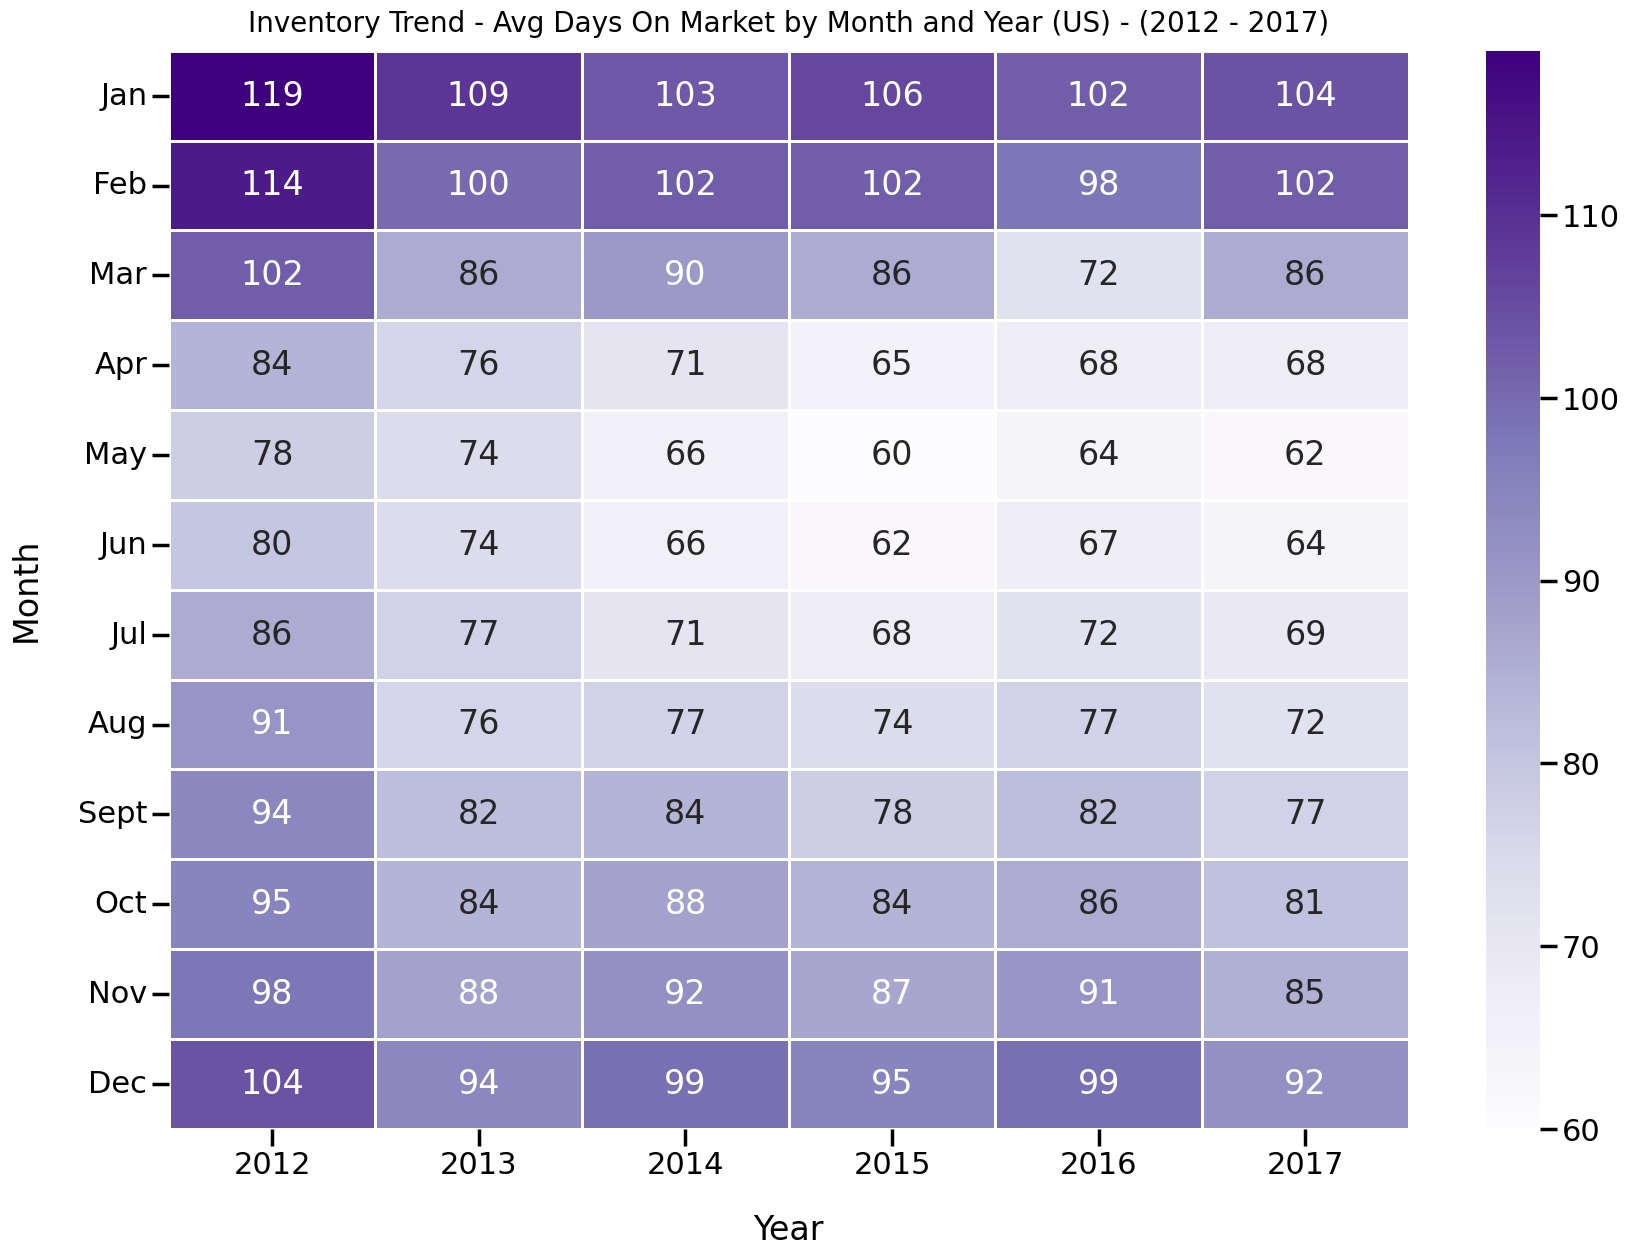

In [72]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(20,14))
ax = sns.heatmap(dfDOMbyYrMon, annot=True, linewidths=.9, ax=ax,fmt="0.0f", yticklabels=month_short_names, xticklabels=year_short_names, cmap="Purples")
ax.axes.set_title("Inventory Trend - Avg Days On Market by Month and Year (US) - (2012 - 2017)", fontsize=20, y=1.01)
ax.set(xlabel='Year', ylabel='Month');
# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0)
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25
plt.show()

Insights : Usually May and June are the best months to Buy/sell houses, since both buyers and sellers are active during summer and houses tend to get sold faster.